# Runge-Kutta Method for Differential Equations

src: 
* [Runge-Kutta Integrator Overview: All Purpose Numerical Integration of Differential Equations](https://www.youtube.com/watch?v=HOWJp8NV5xU&t=112s)



To solve a generic (possibly non-linear) differential equation

$$\dot{x} = f(x, t)$$

we can solve it using an integrator:

$x(t) = x(0) + \int_0^t f(x, \tau) d \tau$. 

> Runge-Kutta may be not good for:
> 
> * Chaotic system
> * Stochastic system
> * Very stiff system with many different time scales

Approach: approximation

## Forward Euler

Forward Euler (FE)

$x_{k+1} = x_k + \Delta t \cdot f(x_k, t_k)$.

### Examples

$\frac{d x}{d t} = -4 x$ with i.c. $x(0) = 3$.

This problem we know the solution:

$x(t) = e^{a t} x(0)$

That is, $x(t) = 3 e^{-4 t}$ in this example.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def forward_euler(f, dt, x0, N):
    '''
    d x/d t = f(x, t)
    * f : RHS function taking x and t
    * dt : time step
    * x0 : initial value
    * N : # steps
    return [x0, x+dt, x+2dt, ..., x+(N-1)dt]
    '''

    xs = [x0]
    ts = [0]
    x = x0
    t = dt
    for n in range(N):
        xnext = x + dt*f(x, t)
        x = xnext
        xs.append(x)
        ts.append(t)
        
        t += dt
    
    return xs, ts

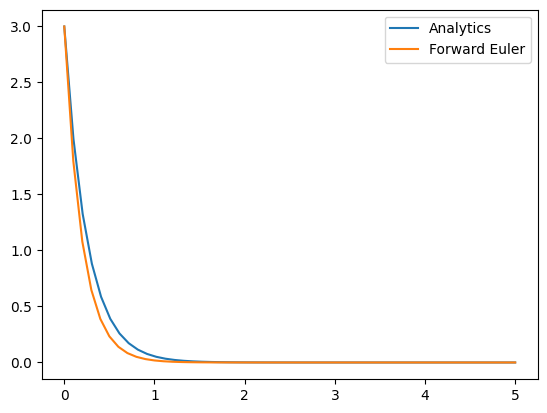

In [10]:
N = 50
T = 5
ts = np.linspace(0, T, N)
xs_a = 3*np.exp(-4*ts)

fsys = lambda x, t: -4*x
dt = T/N
x0 = 3
xs_fe,ts_fe = forward_euler(fsys, dt, x0, N)

plt.plot(ts, xs_a, label='Analytics')
plt.plot(ts_fe, xs_fe, label='Forward Euler')
plt.legend()

## Runge-Kutta 2nd Order (RK2)

$\boxed{x_{k+1} = x_k + \Delta t \cdot f(x_k + \frac{\Delta t}{2} \cdot f(x_k, t_k), t_k + \frac{\Delta t}{2} )}$

* $f(x_k + \frac{\Delta t}{2} \cdot f(x_k, t_k), t_k + \frac{\Delta t}{2} )$ is more or less a half-step direction.

Alternatively, we can write it as:

$x_{k+1} = x_k + \Delta t \cdot f_2$

where

* $f_1 = f(x_k , t_k)$

* $f_2 = f(x_k + \frac{\Delta t}{2} f_1, t_k + \frac{\Delta t}{2} )$

We can say that RK2 uses a half-step direction to approximate the trajectory, rather than the current direction (which may change along the trajectory during time step $\Delta t$).

This requires 2x computation (evaluation) of $f$ (cf. Forward Euler), but is much more accurate (and we can even use a larger time step and save the computation for the entire job.)

Error is "locally" $O(\Delta t^3)$ every time step and "globally" $O(\Delta t^2)$ over an entire trajectory.

But, global error compounds very fast.

### Examples

In [11]:
def RK2(f, dt, x0, N):
    '''
    d x/d t = f(x, t)
    * f : RHS function taking x and t
    * dt : time step
    * x0 : initial value
    * N : # steps
    return [x0, x+dt, x+2dt, ..., x+(N-1)dt]
    '''

    xs = [x0]
    ts = [0]
    x = x0
    t = dt
    for n in range(N):
        f1 = f(x, t)
        f2 = f(x + dt/2 * f1, t + dt/2)
        xnext = x + dt*f2
        
        x = xnext
        xs.append(x)
        ts.append(t)
        
        t += dt
    
    return xs, ts

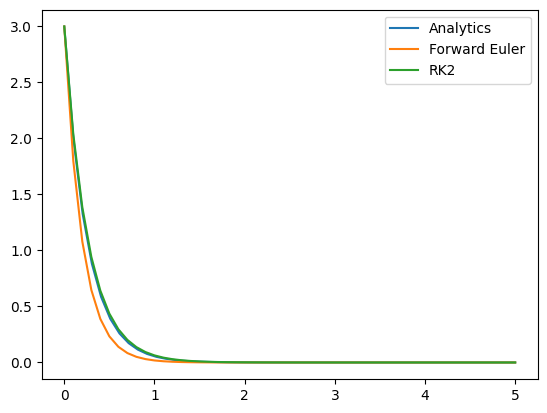

In [12]:
N = 50
T = 5
ts = np.linspace(0, T, N)
xs_a = 3*np.exp(-4*ts)

fsys = lambda x, t: -4*x
dt = T/N
x0 = 3
xs_fe,ts_fe = forward_euler(fsys, dt, x0, N)

xs_rk2,ts_rk2 = RK2(fsys, dt, x0, N)

plt.plot(ts, xs_a, label='Analytics')
plt.plot(ts_fe, xs_fe, label='Forward Euler')
plt.plot(ts_rk2, xs_rk2, label='RK2')
plt.legend()

# RK4

src:
* [Coding a Fourth-Order Runge-Kutta Integrator in Python and Matlab](https://www.youtube.com/watch?v=vNoFdtcPFdk&list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA&index=45)

Fine tune to further reduce error.

RK4:

$\boxed{x_{k+1} = x_k + \frac{\Delta t}{6} \left( f_1 + 2 f_2 + 2 f_3 + f_4 \right)}$

where

* $f_1 = f(x_k, t_k)$

* $f_2 = f(x_k + \frac{\Delta t}{2} f_1, t_k + \frac{\Delta t}{2})$

* $f_3 = f(x_k + \frac{\Delta t}{2} f_3, t_k + \frac{\Delta t}{2})$

* $f_4 = f(x_k + \Delta t  f_3, t_k + \Delta t)$

The errors are reduced to $O(\Delta t^5)$ locally and $O(\Delta t^ 4)$ globally.

### Examples

In [13]:
def RK4(f, dt, x0, N):
    '''
    d x/d t = f(x, t)
    * f : RHS function taking x and t
    * dt : time step
    * x0 : initial value
    * N : # steps
    return [x0, x+dt, x+2dt, ..., x+(N-1)dt]
    '''

    xs = [x0]
    ts = [0]
    x = x0
    t = dt
    for n in range(N):
        f1 = f(x, t)
        f2 = f(x + dt/2 * f1, t + dt/2)
        f3 = f(x + dt/2 * f2, t + dt/2)
        f4 = f(x + dt * f3, t + dt)
        xnext = x + dt*(f1 + 2*f2 + 2*f3 + f4)/6
        
        x = xnext
        xs.append(x)
        ts.append(t)
        
        t += dt
    
    return xs, ts

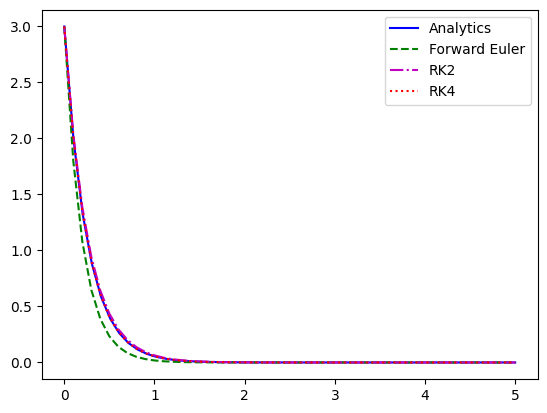

In [18]:
N = 50
T = 5
ts = np.linspace(0, T, N)

analytic_sol = lambda t: 3*np.exp(-4*t)

xs_a = analytic_sol(ts)

fsys = lambda x, t: -4*x
dt = T/N
x0 = 3
xs_fe,ts_fe = forward_euler(fsys, dt, x0, N)

xs_rk2,ts_rk2 = RK2(fsys, dt, x0, N)
xs_rk4,ts_rk4 = RK4(fsys, dt, x0, N)

plt.plot(ts, xs_a, 'b-', label='Analytics')
plt.plot(ts_fe, xs_fe, 'g--', label='Forward Euler')
plt.plot(ts_rk2, xs_rk2, 'm-.', label='RK2')
plt.plot(ts_rk4, xs_rk4, 'r:', label='RK4')

plt.legend()

In [21]:
xs_a.shape

(0,)

In [25]:
TCases = [(xs_fe, ts_fe, 'fe'), (xs_rk2, ts_rk2, 'rk2'), (xs_rk4, ts_rk4, 'rk4')]

for xs_test, ts, lab in TCases:

    xs_a = analytic_sol(np.array(ts))
    mse = np.mean( (xs_a - xs_test)**2 )

    print(lab, 'mse=', mse)

fe mse= 0.00580770046113324
rk2 mse= 0.000149427293745034
rk4 mse= 9.79457252817039e-09


# End